# Samuel John Bouiss

ASSIGNMENT 1

4/5/2018

# Question 1

Compute the complexity of a naive kfold cross validated ridge regression on an $N \times F$ martix.
Ridge regression is given by $\hat{\beta} = (X^{T}X+\lambda I)^{-1}X^{T}y$ where $X = N \times F$.
$$T(X^{T}X+\lambda I) = O(F^2(N-N/K) + F^2) \to O(F^2N)$$  
$T(X^{-1})$ where $X = F \times F \to O(F^3) \to T((X^{T}X+\lambda I)^{-1}X^{T}y) = O(2F^{2}N + F^3 + FN) \to O(F^{2}N + F^3)$

This happens k times, there for complexity of naive kfold is $O(K(F^{2}N + F^3))$ 





# Question 2

Given all items are the same between $X_{-i}^{T}X_{-i}$ and $X^{T}X$ excluding $X_{i}^{T}X_{i} i \in \{1,2,...k\}$ , we can compute and store these items, which allows us to go to $T(FAST RIDGE) = O(F^{2}N + KF^3)$.

In [287]:
#Question 3
import numpy as np
from timeit import default_timer as timer
import matplotlib.pyplot as plt

def generate_test_data(n,f):
    np.random.seed(1)
    
    true_betas = np.random.randn(f)
    X = np.random.randn(n,f)
    Y = np.random.randn(n) + X.dot(true_betas)
    
    return(X,Y)

def naive_ridge(X,Y,num_folds,lambdas):
    mse = np.inf
    best_lamb = { i:0 for i in lambdas}

    for i in range(0,num_folds):
        x_train = np.delete(x,[j for j in range(int(i*len(X)/num_folds),int((1+i)*len(x)/num_folds))],0)
        x_test = X[i*len(X)/num_folds:(i+1)*len(X)/num_folds]
        y_train = np.delete(y,[j for j in range(int(i*len(y)/num_folds),int((1+i)*len(y)/num_folds))],0)
        y_test = y[i*len(y)/num_folds:(i+1)*len(y)/num_folds]
        xtx = np.matmul(x_train.transpose(),x_train)
        for item in lambdas:
            betas = np.matmul(np.matmul(np.linalg.inv(xtx+item*np.identity(len(X[0]))),x_train.transpose()),y_train)
            error = y_test - np.dot(x_test, betas)
            best_lamb[item]+= (error*error).sum()
    betas = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(),X)+min(best_lamb, key=best_lamb.get)*np.identity(len(X[0])))
                              ,X.transpose()),Y)
    return (min(best_lamb, key=best_lamb.get),betas)

def fast_ridge(X,Y,num_folds,lambdas):
    mse = np.inf
    best_lamb = {i:0 for i in lambdas}
    total = np.matmul(x.transpose(),x)
    for i in range(0,num_folds):
        x_train = np.delete(x,[j for j in range(int(i*len(x)/num_folds),int((1+i)*len(x)/num_folds))],0)
        x_test = x[i*len(x)/num_folds:(i+1)*len(x)/num_folds]
        y_train = np.delete(y,[j for j in range(int(i*len(y)/num_folds),int((1+i)*len(y)/num_folds))],0)
        y_test = y[i*len(y)/num_folds:(i+1)*len(y)/num_folds]
        xtx = total - np.matmul(x_test.transpose(),x_test)
        for item in lambdas:
            betas = np.matmul(np.matmul(np.linalg.inv(xtx+item*np.identity(len(X[0]))),x_train.transpose()),y_train)
            error = y_test - np.dot(x_test, betas)
            best_lamb[item] += (error*error).sum()
    betas = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(),X)+min(best_lamb, key=best_lamb.get)*np.identity(len(X[0])))
                              ,X.transpose()),Y)
    return (min(best_lamb, key=best_lamb.get),betas)
        


In [288]:
time_naive = []
time_fast = []
n = []
for i in range(1,20):
    x, y = generate_test_data(1000*i,100)
    n.append(1000*i)
    start = timer()
    naive_ridge(x,y,20,[.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
    end = timer()
    time_naive.append(end-start)
    start = timer()
    fast_ridge(x,y,20,[.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
    end = timer()
    time_fast.append(end-start)
    

C:\Users\Samuel John Bouiss\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Samuel John Bouiss\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Samuel John Bouiss\Anaconda3\lib\site-packages\ipykernel\__main__.py:39: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Samuel John Bouiss\Anaconda3\lib\site-packages\ipykernel\__main__.py:41: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


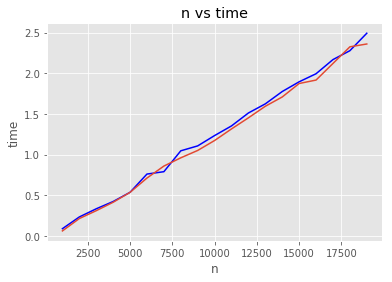

In [289]:
plt.plot(n,time_naive,color='b')
plt.plot(n,time_fast)
plt.title('n vs time')
plt.style.use('ggplot')
plt.xlabel('n')
plt.ylabel('time')
plt.show()

In [292]:
time_naive = []
time_fast = []
f = []
for i in range(1,20):
    x, y = generate_test_data(1000,10*i)
    f.append(10*i)
    start = timer()
    naive_ridge(x,y,20,[.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
    end = timer()
    time_naive.append(end-start)
    start = timer()
    fast_ridge(x,y,20,[.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
    end = timer()
    time_fast.append(end-start)

C:\Users\Samuel John Bouiss\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Samuel John Bouiss\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Samuel John Bouiss\Anaconda3\lib\site-packages\ipykernel\__main__.py:39: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Samuel John Bouiss\Anaconda3\lib\site-packages\ipykernel\__main__.py:41: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


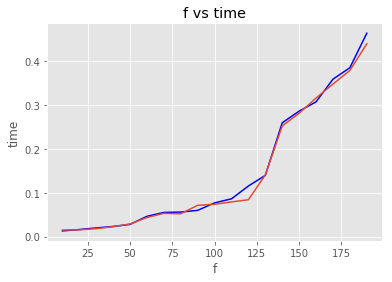

In [293]:
plt.plot(f,time_naive,color='b')
plt.plot(f,time_fast)
plt.title('f vs time')
plt.style.use('ggplot')
plt.xlabel('f')
plt.ylabel('time')
plt.show()